In [66]:
import tensorflow as tf
import os

In [67]:
os.listdir()

['.config',
 'snake-plant-1.png',
 'boston-fern-1.jpg',
 'rubber-plant-2.jpg',
 'RPPOOP_01.h5',
 'zz-plant-1.jpg',
 'TEST.jpeg',
 'logs',
 'Data.zip',
 'Data',
 '.ipynb_checkpoints',
 'sample_data']

In [68]:
gpus = tf.config.experimental.list_physical_devices('GPU')

for gpu in gpus:
  tf.config.experimental.set_memory_growth (gpu, True)

In [69]:
import cv2
import imghdr

In [70]:
data_dir = 'Data'

In [71]:
from zipfile import ZipFile
file_name = 'Data.zip'
with ZipFile (file_name, 'r') as zip:
  zip.extractall()
print("Extraction Done")

Extraction Done


In [72]:
import numpy as np

In [73]:
data = tf.keras.utils.image_dataset_from_directory("Data")

Found 2215 files belonging to 10 classes.


In [74]:
data = data.map (lambda x, y: (x/255,y ))

In [75]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
batch [0].min()

0.0

In [76]:
batch[0].max()

1.0

# Marker

In [77]:
train_size = 49
val_size = 19
test_size = 7

In [78]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [80]:
model = Sequential()

In [81]:
model.add(Conv2D(16, (3, 3), 1, activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D (32, (3, 3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D (16, (3, 3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense (256, activation = 'relu'))
model.add (Dense(10, activation = 'softmax'))

In [92]:
model.compile('adam', loss = tf.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])

In [93]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 16)       

In [94]:
logdir = 'logs'

In [95]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [96]:
hist = model.fit(train, epochs = 25, validation_data= val, callbacks = [tensorboard_callback])

Epoch 1/25
49/49 [==============================] - 6s 89ms/step - loss: 2.3423 - accuracy: 0.1696 - val_loss: 2.1928 - val_accuracy: 0.2039
Epoch 2/25
49/49 [==============================] - 5s 105ms/step - loss: 2.1763 - accuracy: 0.2041 - val_loss: 2.0329 - val_accuracy: 0.2780
Epoch 3/25
49/49 [==============================] - 4s 85ms/step - loss: 1.9607 - accuracy: 0.3119 - val_loss: 1.8028 - val_accuracy: 0.3947
Epoch 4/25
49/49 [==============================] - 4s 84ms/step - loss: 1.7028 - accuracy: 0.4177 - val_loss: 1.6201 - val_accuracy: 0.4638
Epoch 5/25
49/49 [==============================] - 5s 103ms/step - loss: 1.3808 - accuracy: 0.5319 - val_loss: 1.4245 - val_accuracy: 0.5148
Epoch 6/25
49/49 [==============================] - 5s 94ms/step - loss: 0.9998 - accuracy: 0.6875 - val_loss: 1.3587 - val_accuracy: 0.5444
Epoch 7/25
49/49 [==============================] - 6s 123ms/step - loss: 0.6257 - accuracy: 0.8119 - val_loss: 1.3332 - val_accuracy: 0.5740
Epoch 8/25

In [97]:
import matplotlib.pyplot as plt

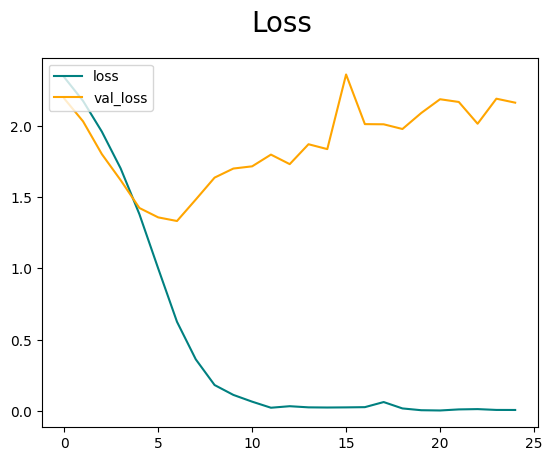

In [98]:
fig = plt.figure()
plt.plot (hist.history['loss'], color = 'teal', label = 'loss')
plt.plot (hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

In [99]:
model.save('RPPOOP_03.h5')

In [100]:
from tensorflow.keras.models import load_model

In [101]:
new_model = load_model('RPPOOP_01.h5')

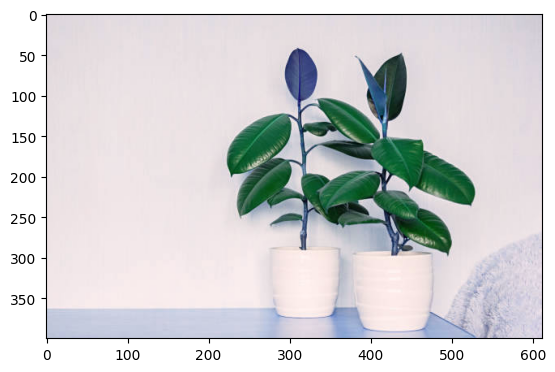

In [102]:
img = cv2.imread('rubber-plant-2.jpg')
plt.imshow(img)
plt.show()

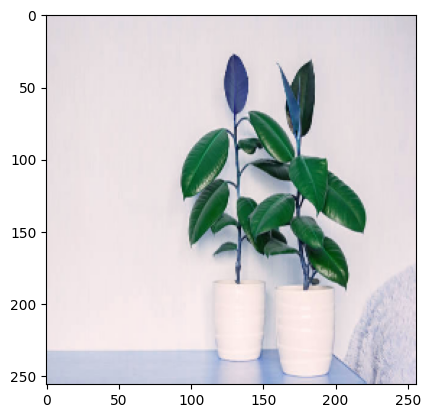

In [103]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [104]:
yhat = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 76ms/step


In [105]:
np.argmax(yhat[0])

6

In [106]:
tf.__version__

'2.15.0'